# Кластеризация

In [4]:
import re
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Данные

Новости: https://drive.google.com/open?id=12adiAGpoIwNJWffJIIE78-e3t1G5j5d8

События: https://drive.google.com/open?id=121UUDI_UvzzU1s7SG21k2ltpJAUEVIhv

In [ ]:
# для колаба:
# 1. запускаете эту ячейку
# 2. ждёте
# 3. внизу появляется кнопка с загрузкой с компьютера
# 4. выбираете файл на компьютере и загружаете
# 5. доооолго ждёте, пока` он скачается -_-
from google.colab import files
uploaded = files.upload()

### Предобработка

In [5]:
# Загрузили данные
df_events = pd.read_csv('events.csv')
df_news = pd.read_csv('raw_news.csv', index_col='id')

In [6]:
df_events

,id,date,name
0,1,01/10/17 12:00 AM,Власти Петербурга согласились передать РПЦ Иса...
1,2,01/20/17 12:00 AM,Дональд Трамп вступил в должность президента США.
2,3,02/20/17 12:00 AM,Скоропостижно скончался постпред России при ОО...
3,4,03/02/17 12:00 AM,Вышел фильм Навального «он Вам не димон»
4,5,03/14/17 12:00 AM,CNN показала фильм «Владимир Путин — самый вли...
5,6,03/21/17 12:00 AM,Умер Дэвид рокфеллер
6,7,03/22/17 12:00 AM,теракт произошел в центре Лондона
7,8,03/22/17 12:00 AM,Юлию Самойлову не пустили на евровидении в Киеве
8,9,03/23/17 12:00 AM,В центре Киева был убит бывший депутат Госдумы...
9,10,03/26/17 12:00 AM,Митинг в москве против коррупции


Посмотрим на данные:

In [7]:
print(df_news[df_news['event_id'] == 14].iloc[1].text)

 Вести.ru, Москва, 19 апреля 2017 МЕДВЕДЕВ: НАЛОГИ В 2017 ГОДУ ПОВЫШАТЬСЯ НЕ БУДУТ В 2017 году налоги повышаться не будут, заверил депутатов Госдумы премьер-министр России Дмитрий Медведев. Он напомнил, что решение о стабильности налоговой системы было принято несколько лет назад. Кроме того, правительство продолжает выполнять установки президентских майских указов по повышению зарплат работникам образования, культуры и медицины. "Экономическая ситуация последних лет сказалась на доходах людей негативно, зарплаты в стране невысокие. Мы предпринимаем усилия для того, чтобы ситуацию выправить, ищем дополнительные ресурсы, чтобы помочь тем, кто зарабатывает мало", - отметил Медведев, выступая с отчетом о работе российского правительства за 2016 год в Думе. Дмитрий Медведев попросил депутатов и регионы активнее участвовать в работе по повышению зарплат работников этих сфер. Кроме того, правительство регулярно повышает минимальный размер оплаты труда, напомнил Медведев. В 2016 году он дости

In [8]:
# Загрузили стопслова для русского языка из nltk
stopset = stopwords.words('russian')
stopset[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [9]:
# Токенизация, чистка
def tokenize(msg):
    # убрали знаки препинания и привели к нижнему регистру
    msg = re.sub('[!"?/\\().:;,-]', '', msg).lower()
    msg = [w for w in word_tokenize(msg) if not w in stopset] # токенизировали и избавились от стоп слов
    return msg

In [10]:
tokenize(df_news['text'].iloc[0])[:10]

['петербурге',
 'прошел',
 'митинг',
 'против',
 'передачи',
 'исаакиевского',
 'собора',
 'рпц',
 'санктпетербурге',
 'люди']

Посмотрим на распоределение данных по событиям:

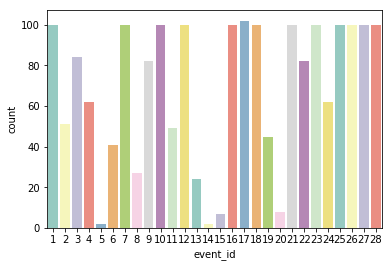

In [11]:
sns.countplot(x=df_news['event_id'], data=df_news, palette="Set3")

Из представленного выше графика видно, что данные неоднородны.

## Часть 2. Кластеризация текстов

**Задача**: Кластеризовать новости и проверить, получается ли восстановить кластерную структуру новостей, то есть, разделить их на 28 кластеров, соответствущих событиям.

### Строим k-means модель на tf-idf

В этом разделе мы применим один из методов кластеризации с использованием tf-idf и метода k-means.

#### Tf-idf преобразование

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

Преобразовываем документы в векторы с tf-idf.

In [13]:
bow_tfidf = TfidfVectorizer(tokenizer=tokenize)
bowed_news = bow_tfidf.fit_transform(df_news['text'])

In [14]:
bowed_news

<1930x65180 sparse matrix of type '<class 'numpy.float64'>'
	with 509127 stored elements in Compressed Sparse Row format>

#### K-means кластериазация

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=28, init='k-means++', max_iter=100, n_init=1, random_state=37)
model.fit(bowed_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=28, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=37, tol=0.0001, verbose=0)

Чтобы примерно оценить темы новостных кластеров, выведем для каждого из них топ 10 слов, характерных для каждого кластера:

In [39]:
len(model.cluster_centers_)

28

In [33]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1] # индексы слов, по мере убывания близости к центру
terms = bow_tfidf.get_feature_names() # массив слов в том порядке, в котором их помнит kmeans
for i in range(28):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]: # печатаем 10 самых близких
        print(terms[ind])
    print()

Top terms per cluster:
Cluster 0:
лондоне
теракт
теракта
марта
мэй
парламента
23
великобритании
мосту
террорист

Cluster 1:
меркель
германии
сочи
украине
это
фрау
путина
порошенко
путиным
украина

Cluster 2:
вороненков
вороненкова
денис
убит
госдумы
дениса
украины
киеве
киева
убийство

Cluster 3:
урагана
москве
ск
человек
петренко
области
подмосковье
стихии
мая
московской

Cluster 4:
акции
навального
навальный
митинг
протеста
москве
митинга
человек
тверской
июня

Cluster 5:
httpwwwsportexpressruhockeyworldreviewskakizmenitsyasbornayasorlovymikuznecovym1254960
afp
кузнецов
евгений
игроки
евтушенко
любил
бацын
фото
литературы

Cluster 6:
барселоне
риа
барселоны
новости
камбрильсе
испании
каталонии
>
людей
фургон

Cluster 7:
собора
рпц
исаакиевского
передачи
собор
января
исаакиевский
церкви
акция
против

Cluster 8:
%
d0
d1
b5
be
b8
81
b2
b0
80

Cluster 9:
сбора
сбор
курортного
законопроект
курортный
эксперимента
курортной
госдуму
алтайском
рублей

Cluster 10:
партия
великобритании
мандато

По субъективным ощущениям от характерных терминов, новости кластеризовались хорошо.

### Оценки

In [1]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

In [26]:
labels = df_news.event_id # истинные метки событий
clust_labels = model.labels_ # метки номеров кластеров, возвращённых алгортмом

Суть метрик качества и их значение для модели с дефолтными настройками. В следующем разделе мы попробуем другие модели и пытаемся проинтерпретировать результаты.

Меряем Adjusted Rand Index.

**Rand Index (RI)** выражает схожесть двух разных кластеризаций одной и той же выборки. Пусть n — число объектов в выборке, a — число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, b — число пар объектов, имеющих различные метки и находящихся в разных кластерах.

$$RI = \frac{2(a + b)}{n(n - 1)}$$

Это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Эта мера не зависит от значений и перестановок меток. 

**Adjusted Rand Index** — это Rand Index, нормированный, чтобы он давал значения близкие к нулю для случайных кластеризаций при любом n и числе кластеров:

$$ARI = \frac{RI - E[RI]}{max(RI)-E[RI]}$$

(Теория взята из статьи на хабрахабр: https://habrahabr.ru/company/ods/blog/325654/)

In [27]:
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Adjusted Rand-Index: 0.766098680977905


Меряем гомогенность, полноту и V-меру.

Пусть K — результат кластеризации, C — истинное разбиение выборки на классы. Гомогенность h и полнота с определяются с использованием функций энтропии и условной энтропии:

$$h = 1 - \frac{H(C|K)}{H(C)}\text{, }c = 1 - \frac{H(K|C)}{H(K)}$$

V-мера -- это среднее гармоическое от h и c.

Так как данные метрики дают более точный результат при маленьком количестве кластеров, мы будем в большей мере ориентироваться на ARI.
([Хорошее объяснение](https://www.geeksforgeeks.org/ml-v-measure-for-evaluating-clustering-performance/))

In [28]:
print("Гомогенность:", homogeneity_score(labels, clust_labels))
print("Полнота:", completeness_score(labels, clust_labels))
print("V-мера",  v_measure_score(labels, clust_labels))

Гомогенность: 0.8982108664656662
Полнота: 0.9080279150963403
V-мера 0.9030927125685762


Как мы видим, новости довольно хорошо разбиваются на кластеры в конфигурации tf-idf + k-means.

### Альтернативные модели

А теперь давайте поизменяем гиперпараметры и попробуем другие алгоритмы. Станет ли лучше?

In [116]:
from sklearn.cluster import DBSCAN

In [118]:
clust = DBSCAN()
clust.fit(bowed_news)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [123]:
dbscan_labels = clust.labels_

In [124]:
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, dbscan_labels))

Adjusted Rand-Index: 0.00311585345097457


In [125]:
print("Гомогенность:", homogeneity_score(labels, dbscan_labels))
print("Полнота:", completeness_score(labels, dbscan_labels))
print("V-мера",  v_measure_score(labels, dbscan_labels))

Гомогенность: 0.0730500897149184
Полнота: 0.49006413668830046
V-мера 0.12714730856581233


Вернёмся к кластеризации:

In [126]:
model = KMeans(n_clusters=7, init='k-means++', max_iter=100, n_init=1, random_state=37)
model.fit(bowed_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=7, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=37, tol=0.0001, verbose=0)

In [131]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = bow_tfidf.get_feature_names()
for i in range(7):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :7]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 лондоне
 барселоне
 теракт
 теракта
 риа
 falcon
 человек
Cluster 1:
 путин
 меркель
 сша
 чуркин
 трамп
 президент
 путина
Cluster 2:
 %
 партия
 великобритании
 выборов
 d0
 мандатов
 мэй
Cluster 3:
 евтушенко
 акции
 навального
 собора
 навальный
 евгений
 рпц
Cluster 4:
 урагана
 москве
 человек
 погибших
 мая
 ураган
 30
Cluster 5:
 голосования
 %
 выборы
 явка
 выборах
 сентября
 избирателей
Cluster 6:
 сбора
 сбор
 курортного
 эксперимента
 законопроект
 курортный
 курортной


# SVD

Возмём задачу из позапрошлого семинара и добавим в представлние дркументов SVD. 

In [155]:
lenta = pd.read_csv('news_lenta_cropped.csv')

In [156]:
lenta.head()

,title,topic
0,Грудь Бритни Спирс вновь выскочила из лифчика ...,Культура
1,Попытка вернуть укатившийся мяч у Кремлевской ...,Силовые структуры
2,Хабенский стал врагом Украины,Культура
3,В Туркмении запретили продажу алкоголя,Бывший СССР
4,В Великобритании нашли утерянный сценарий Стен...,Культура


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [158]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(lenta.title)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(bow, lenta.topic)

In [160]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, clf.predict(X_test)))

                   precision    recall  f1-score   support

      Бывший СССР       0.96      0.96      0.96     12949
         Культура       0.93      0.97      0.95     13162
Силовые структуры       0.93      0.87      0.90      4644
         Ценности       0.96      0.75      0.84      1728

      avg / total       0.94      0.94      0.94     32483



Попробуем SVD:

In [46]:
from sklearn.decomposition import TruncatedSVD

In [140]:
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [141]:
svd.fit(bow)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=7,
       random_state=42, tol=0.0)

In [142]:
bow_transformed = svd.transform(bow)

In [79]:
len(bow_transformed[0])

300

Посмотрим, что он умеет:

In [102]:
a = svd.transform(vectorizer.transform(['президент приехал с визитом']))
b = svd.transform(vectorizer.transform(['президент приехал в москву']))
c = svd.transform(vectorizer.transform(['кот смотрит на картины']))

In [103]:
from sklearn.metrics.pairwise import cosine_similarity

In [104]:
cosine_similarity(a, b)

array([[0.72361874]])

In [105]:
cosine_similarity(a, c)

array([[-0.00037305]])

In [146]:
at = vectorizer.transform(['президент приехал с визитом'])
bt = vectorizer.transform(['президент приехал в москву'])
ct = vectorizer.transform(['кот смотрит на картины'])

In [147]:
cosine_similarity(at, bt)

array([[0.66666667]])

In [148]:
cosine_similarity(at, ct)

array([[0.]])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(bow_transformed, lenta.topic)

In [144]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
print(classification_report(y_test, clf.predict(X_test)))

                   precision    recall  f1-score   support

      Бывший СССР       0.83      0.78      0.81     12989
         Культура       0.69      0.91      0.79     13133
Силовые структуры       0.67      0.39      0.49      4622
         Ценности       0.58      0.11      0.18      1739

      avg / total       0.74      0.74      0.72     32483



**Задание**: попробуйте разное количество компонент в SVD.